<a href="https://colab.research.google.com/github/natashaaf/detectarFraude/blob/main/Deteccion_de_fraude_en_tarjeta_de_credito.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Detección de fraude en tarjeta de credito**

---

El conjunto de datos analizado contiene más de 550.000 transacciones con tarjeta de crédito realizadas por titulares europeos durante 2023, clasificadas como normales (0) o fraudulentas (1). Por motivos de seguridad, algunas variables han sido anonimizadas y representan características internas de las transacciones, por lo que no se tendrán en cuenta en este estudio, ya que su análisis requiere técnicas avanzadas de machine learning.

El presente trabajo se centra en analizar la distribución general de las transacciones y en comparar las transacciones fraudulentas con las normales mediante gráficos y estadísticas básicas.

In [69]:
#Importanto librerias...

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Lectura del dataset exportada de Kaggle.

In [70]:
df = pd.read_csv('creditcard_2023.csv')
df.head()

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-0.260648,-0.469648,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,...,-0.110552,0.217606,-0.134794,0.165959,0.126280,-0.434824,-0.081230,-0.151045,17982.10,0.0
1,1,0.985100,-0.356045,0.558056,-0.429654,0.277140,0.428605,0.406466,-0.133118,0.347452,...,-0.194936,-0.605761,0.079469,-0.577395,0.190090,0.296503,-0.248052,-0.064512,6531.37,0.0
2,2,-0.260272,-0.949385,1.728538,-0.457986,0.074062,1.419481,0.743511,-0.095576,-0.261297,...,-0.005020,0.702906,0.945045,-1.154666,-0.605564,-0.312895,-0.300258,-0.244718,2513.54,0.0
3,3,-0.152152,-0.508959,1.746840,-1.090178,0.249486,1.143312,0.518269,-0.065130,-0.205698,...,-0.146927,-0.038212,-0.214048,-1.893131,1.003963,-0.515950,-0.165316,0.048424,5384.44,0.0
4,4,-0.206820,-0.165280,1.527053,-0.448293,0.106125,0.530549,0.658849,-0.212660,1.049921,...,-0.106984,0.729727,-0.161666,0.312561,-0.414116,1.071126,0.023712,0.419117,14278.97,0.0


Extrae informaciones básicas de los datos que deseamos analizar.

In [ ]:
df[['Amount', 'Class']].info()
df[['Amount', 'Class']].describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365192 entries, 0 to 365191
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Amount  365191 non-null  float64
 1   Class   365191 non-null  float64
dtypes: float64(2)
memory usage: 5.6 MB


,Amount,Class
count,365191.000000,365191.000000
mean,12036.986677,0.221462
std,6924.900309,0.415231
min,50.120000,0.000000
25%,6049.195000,0.000000
50%,12018.670000,0.000000
75%,18044.285000,0.000000
max,24039.930000,1.000000


Análisis básica de los datos y conversión en porcentaje.

Cuantos datos hay?
Cuantas fraudes y operacciones normales?


In [ ]:
df['Class'].value_counts()
df['Class'].value_counts(normalize=True) * 100


,proportion
Class,
0.0,77.853781
1.0,22.146219


# **Gráfico 1 - Cantidad de fraudes vs normales**

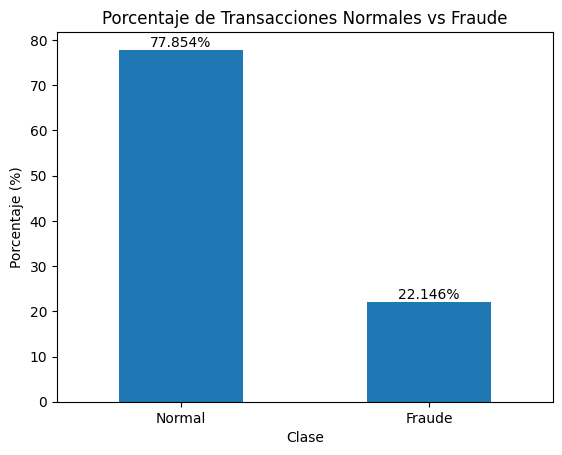

In [ ]:
porcentajes = df['Class'].value_counts(normalize=True) * 100
ax = porcentajes.plot(kind='bar')

plt.title('Porcentaje de Transacciones Normales vs Fraude')
plt.xlabel('Clase')
plt.ylabel('Porcentaje (%)')
plt.xticks([0, 1], ['Normal', 'Fraude'], rotation=0)

# Mostrar valores encima de las barras
for i, valor in enumerate(porcentajes):
    ax.text(i, valor, f'{valor:.3f}%', ha='center', va='bottom')

plt.show()

En versiones anteriores del dataset, los fraudes eran menos del 1 %, lo que lo hacía muy desbalanceado. Esto me sorprendió, ya que al haber tan pocos fraudes frente a las transacciones normales, resulta más difícil detectarlos y el sistema tiende a asumir que casi todas las transacciones son normales.

En cambio, en el conjunto de datos actual, los fraudes representan aproximadamente el 22 %, lo que reduce notablemente ese desbalance y permite realizar un análisis más equilibrado entre las transacciones normales y las fraudulentas.

# **Gráfico 2 - Distribuiccion de los valores**

Al principio se utilizó otro tipo de gráfico, pero como la mayoría de los valores son bajos, esto dificultaba la comprensión de los datos. Por esa razón, se adoptó una escala logarítmica, que es más adecuada para este tipo de situación por permitir una mejor visualización de los datos.

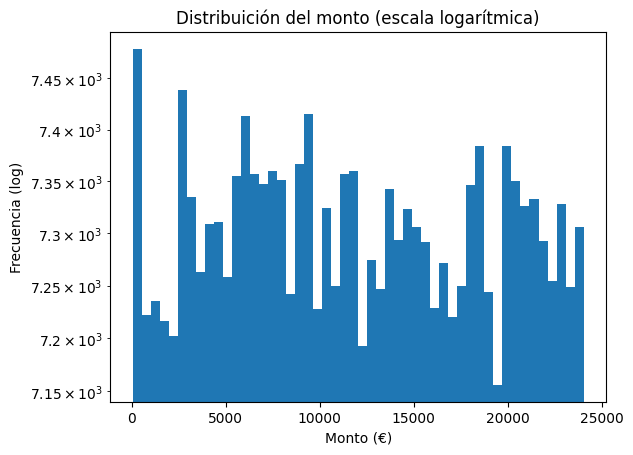

In [ ]:
plt.hist(df['Amount'], bins=50)
plt.yscale('log')
plt.title('Distribuición del monto (escala logarítmica)')
plt.xlabel('Monto (€)')
plt.ylabel('Frecuencia (log)')
plt.show()

Este gráfico muestra cómo se distribuyen los montos de las transacciones en euro. En el eje horizontal se representan los valores de las compras, y en el eje vertical la cantidad de veces que ocurre cada monto. La mayoría de las transacciones corresponde a montos bajos, típicos de compras diarias, mientras que las compras muy altas son menos frecuentes.

Esta distribución ayuda a comprender cuál es el gasto normal y también permite identificar transacciones atípicas, que podrían indicar errores o situaciones sospechosas.

# **Gráfico 3 - Comparación de valores (fraude vs normal)**

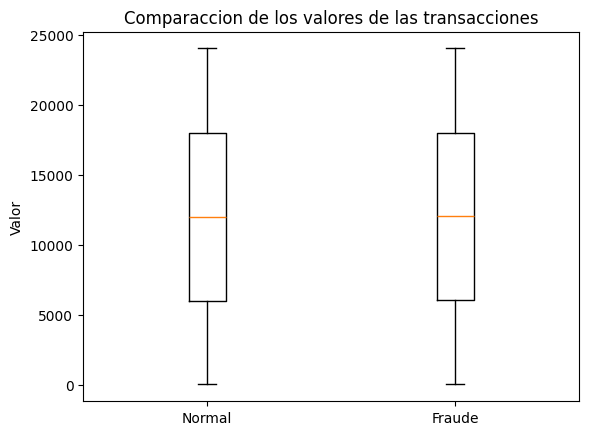

In [72]:
normal = df[df['Class'] == 0]
fraude = df[df['Class'] == 1]

plt.boxplot([normal['Amount'], fraude['Amount']],
            tick_labels=['Normal', 'Fraude'])
plt.title('Comparaccion de los valores de las transacciones')
plt.ylabel('Valor')
plt.show()


El gráfico compara los montos de las transacciones normales y fraudulentas usando un boxplot, donde la caja muestra la mayoría de los datos (del 25% al 75%) y la línea del medio indica la mediana, mientras que los bigotes marcan los valores más pequeños y grandes. Se observa que ambos tipos de transacciones tienen rangos y medianas muy similares.

Conclusión: no se puede identificar fácilmente una transacción fraudulenta solo por su valor, y probablemente habría que mirar otras características para detectarlas.